# Predict Future Sales

**Mert Hüseyin UZAN**

Evaluated by root mean squared error (RMSE).


Importing libraries and loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#sales_train=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
#test=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')
#submission=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv')

sales_train=pd.read_csv('sales_train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

Sales train data info

In [2]:
print("Sales train data info")
sales_train.info()
sales_train.head(5)

Sales train data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Test data info

In [3]:
print("Test data info")
test.info()
test.head(5)

Test data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


Checking missing values on train and test data

In [4]:
print("Sales Train data")
print("Null values:",sales_train.isnull().values.any())
print("NaN values:",sales_train.isna().values.any())
print()
print("Test data")
print("Null values:",test.isnull().values.any())
print("NaN values:",test.isna().values.any())

Sales Train data
Null values: False
NaN values: False

Test data
Null values: False
NaN values: False


Checking for outliers

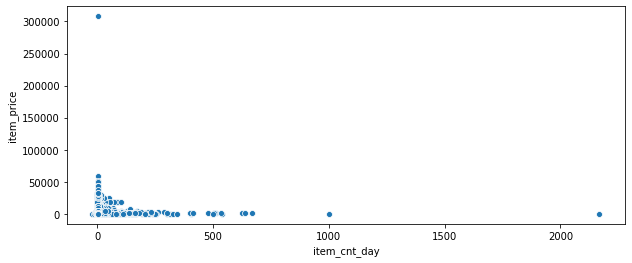

In [5]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=sales_train.item_cnt_day, y=sales_train.item_price, data=sales_train)

Removing outliers

In [6]:
sales_train = sales_train[sales_train.item_price<75000]
sales_train = sales_train[sales_train.item_cnt_day<1001]
sales_train = sales_train[sales_train.item_cnt_day>=0]

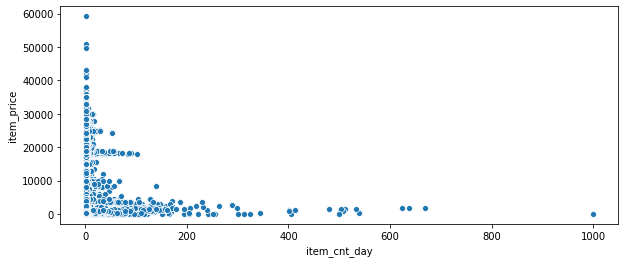

In [7]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=sales_train.item_cnt_day, y=sales_train.item_price, data=sales_train)

Grouping data by month and splitting x,y

In [8]:
grouped_train = sales_train.groupby(["date_block_num","shop_id","item_id"])["item_cnt_day"].agg('sum').reset_index()
x=grouped_train.iloc[:,:-1]
y=grouped_train.iloc[:,-1:]
y=y.clip(0,20)
print("X:")
print(x.head(5))
print("Y:")
print(y.head(5))

X:
   date_block_num  shop_id  item_id
0               0        0       32
1               0        0       33
2               0        0       35
3               0        0       43
4               0        0       51
Y:
   item_cnt_day
0           6.0
1           3.0
2           1.0
3           1.0
4           2.0


Sales_train data train, test split

In [9]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=0)

# Model Selection

Random Forest Regressor Model

In [10]:
model = RandomForestRegressor(n_estimators=25,random_state=0)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("---Random Forest Regressor---")
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

C:\Users\merth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


---Random Forest Regressor---
Root Mean Squared Error: 1.7236501072889054


Extra Trees Regressor Model

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=25,random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("---Extra Trees Regressor---")
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

C:\Users\merth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


---Extra Trees Regressor---
Root Mean Squared Error: 1.8914355710909159


Bagging Regressor Model

In [12]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(n_estimators=25,random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("---Bagging Regressor---")
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

C:\Users\merth\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


---Bagging Regressor---
Root Mean Squared Error: 1.7242145471128256


According to model performances, Random Forest Regressor selected for next month sales

Test data

In [13]:
test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


Preparing test data for prediction

In [14]:
test_df=test.iloc[:,1:]
test_df['date_block_num']=34
cols = test_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
test_df=test_df[cols]

test_df.head(5)

,date_block_num,shop_id,item_id
0,34,5,5037
1,34,5,5320
2,34,5,5233
3,34,5,5232
4,34,5,5268


Predicting next month sales with Random Forest Regressor

In [15]:
model = RandomForestRegressor(n_estimators=25,random_state=0)
model.fit(x,y)
test_pred=model.predict(test_df)
pred_df=pd.DataFrame(test_pred,columns=["item_cnt_month"])

C:\Users\merth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Output data

In [16]:
pred_df=pred_df.clip(0,20)
submission.drop(columns=['item_cnt_month'],inplace=True)
submission=pd.concat([submission,pred_df],axis=1)
submission.head(5)

,ID,item_cnt_month
0,0,1.16
1,1,1.64
2,2,1.12
3,3,1.12
4,4,1.00


Output file

In [17]:
submission.to_csv('submission.csv', index=False)